In [39]:
import numpy as np

DX = 0.5

xmin = -10
xmax = -xmin
ymin = xmin
ymax = -xmin
zmin = xmin
zmax = -xmin


x1d = np.arange( xmin, xmax+DX, DX) 
y1d = np.arange( ymin, ymax+DX, DX)
z1d = np.arange( zmin, zmax+DX, DX)


x2d, y2d = np.meshgrid( x1d, y1d )
x3d, y3d, z3d = np.meshgrid( x1d, y1d, z1d )
print( x2d.shape, y2d.shape)

(41, 41) (41, 41)


In [40]:
cx = 0.1
cy = 0.1
cz = 0.1

dx1d = x1d - cx
dy1d = y1d - cy
dz1d = z1d - cz
dx2d, dy2d = np.meshgrid( dx1d, dy1d )
dx3d, dy3d, dz3d = np.meshgrid( dx1d, dy1d, dz1d )

dist2d = np.sqrt( np.square(dx2d) + np.square(dy2d) )
dist3d = np.sqrt( np.square(dx3d) + np.square(dy3d) + np.square(dz3d) )

z2d = np.zeros( x2d.shape )
z2d2 = np.zeros( x2d.shape )

#z3d2 = np.zeros( x3d.shape )


dg = 2
z2d[:] = 25
z2d[ ( (np.mod( np.floor(dx2d/DX), dg ) != 0.0 ) |
         (np.mod( np.floor(dy2d/DX), dg ) != 0.0 ) )
    & 
       ( ( np.abs( dx2d ) > DX ) | 
         ( np.abs( dy2d ) > DX ) )] = 0.5

#z3d[:] = 25
#z3d[ ( (np.mod( np.floor(dx3d/DX), dg ) != 0.0 ) |
#         (np.mod( np.floor(dy3d/DX), dg ) != 0.0 ) )
#    & 
#       ( ( np.abs( dx3d ) > DX ) | 
#         ( np.abs( dy3d ) > DX ) )] = 0.5


# behavior of int() in Fortran
x2di = dx2d / DX 
x2di = np.abs( np.where( x2di >= 0.0, np.floor(dx2d/DX), np.modf(dx2d/DX)[1] ) )

y2di = dy2d / DX
y2di = np.abs( np.where( y2di >= 0.0, np.floor(dy2d/DX), np.modf(dy2d/DX)[1] ) )

z2d2 = np.where( (np.mod( x2di, dg) != 0 ) | 
                (np.mod( y2di, dg) != 0 ), 
                0.5 , 25) 

x3di = dx3d / DX 
x3di = np.abs( np.where( x3di >= 0.0, np.floor(dx3d/DX), np.modf(dx3d/DX)[1] ) )

y3di = dy3d / DX
y3di = np.abs( np.where( y3di >= 0.0, np.floor(dy3d/DX), np.modf(dy3d/DX)[1] ) )

z3di = dz3d / DX
z3di = np.abs( np.where( z3di >= 0.0, np.floor(dz3d/DX), np.modf(dz3d/DX)[1] ) )


z3d2 = np.where( (np.mod( x3di, dg) != 0 ) | 
                (np.mod( y3di, dg) != 0 ) |
                (np.mod( z3di, dg) != 0 ), 
                0.5 , 25) 



Text(0, 0.5, 'Number of Observations')

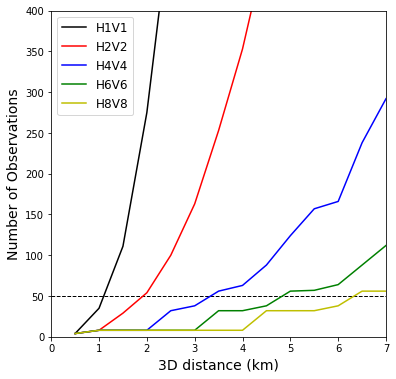

In [53]:
nobs = 0

dgx_l = np.arange(1, 10, 2)
dgx_l[1:] -= 1

dgz_l = dgx_l
dist_l = np.arange(7.0, 0.0, -0.5 )

nobs_l = np.zeros( ( len(dgx_l), len(dist_l) ) )

for g, (dgx, dgz) in enumerate( zip(dgx_l, dgz_l) ): 
    z3d_ = np.where( (np.mod( x3di, dgx) != 0 ) | 
                (np.mod( y3di, dgx) != 0 ) |
                (np.mod( z3di, dgz) != 0 ), 
                0.5 , 25)
    for d, dist in enumerate( dist_l ):
        z3d_[ np.abs( dist3d ) > dist ] = 0.5
        nobs_ = len( z3d_[z3d_ > 1.0] )
        nobs_l[g,d] = nobs_

import matplotlib.pyplot as plt

c_l = [ 'k', 'r', 'b', 'g', 'y']

fig, ((ax2) ) = plt.subplots(1, 1, figsize=( 6,6) )
for g, (dgx, dgz) in enumerate( zip(dgx_l, dgz_l) ) :
    ax2.plot( dist_l, nobs_l[g,:], color=c_l[g],
            label='H{0:}V{1:}'.format(dgx, dgz))

    

ax2.legend( fontsize=12, loc='upper left')
ymax2_ = 400
xmax2_ = 7
xlab2_ = "3D distance (km)"
ylab2_ = "Number of Observations"

ax2.set_ylim( 0, ymax2_ )    
ax2.set_xlim( 0, xmax2_ )   
ax2.hlines( xmin=0, xmax=xmax2_, y=50, linestyle='dashed', lw=1.0)
ax2.set_xlabel( xlab2_, fontsize=14 )
ax2.set_ylabel( ylab2_, fontsize=14 )

Nobs: 58 (2D), 353 (3D)


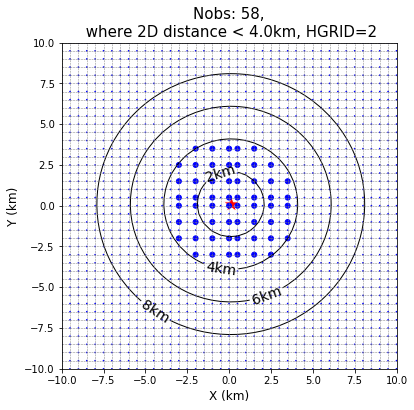

In [54]:
import matplotlib.pyplot as plt

fig, ((ax1) ) = plt.subplots(1, 1, figsize=( 6,6) )

CENTER = ax1.scatter(cx, cy, s=300.0, c='r', marker='*',
                   edgecolors='w') 

#SCAT = ax1.scatter(x2d, y2d, s=z2d, color='k' ) 


dist_max = 4.0


data = z2d
data = z2d2
data3d = z3d2


data[ np.abs( dist2d ) > dist_max ] = 0.5
data3d[ np.abs( dist3d ) > dist_max ] = 0.5


SCAT2 = ax1.scatter(x2d, y2d, s=data, color='b' ) 

levs = np.arange( 2, 10, 2)
CONT = ax1.contour( x2d, y2d, dist2d, levels=levs,
                  linewidths=1.0, colors='k')
ax1.clabel( CONT, inline=True, fmt='%1.0fkm', fontsize=14)



lw = 0.5
ax1.hlines( y=y1d, xmin=xmin, xmax=xmax, ls='dashed', lw=lw, colors='gray')
ax1.vlines( x=x1d, ymin=ymin, ymax=ymax, ls='dashed', lw=lw, colors='gray')

ax1.set_xlim( xmin, xmax )
ax1.set_ylim( ymin, ymax )

xlab = "X (km)"
ax1.set_xlabel(xlab, fontsize=12)
ylab = "Y (km)"
ax1.set_ylabel(ylab, fontsize=12)

tit = 'Nobs: {0:},\n where 2D distance < {1:.1f}km, HGRID={2:}'.format( len(data[data > 1.0]), dist_max, dg )

ax1.text( 0.5, 1.01, tit,
                fontsize=15, transform=ax1.transAxes,
                 horizontalalignment='center',
                 verticalalignment='bottom',
                  )

print( 'Nobs: {0:} (2D), {1:} (3D)'.format( len(data[ data > 1.0]), len(data3d[ data3d > 1.0]) ) )